<a href="https://colab.research.google.com/github/AlirezaSamari/DeepLearning-Pytorch-fastai-/blob/main/02_SomeMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from fastai import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
from fastcore import *

##Calculating Gradients

In [2]:
x = torch.linspace(-2, 2, 50)
def f(x): return x**2

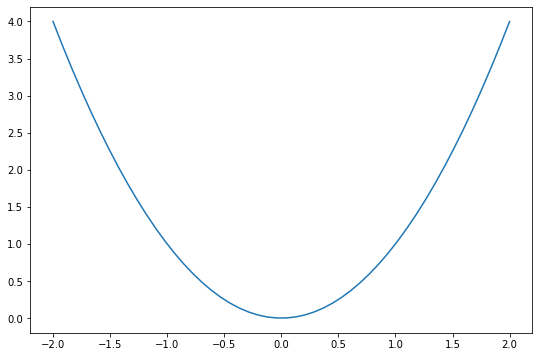

In [3]:
plt.figure(figsize=(9,6))
plt.plot(x, f(x))

In [4]:
xt = torch.tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [5]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [6]:
yt.backward()

In [7]:
xt.grad

tensor(6.)

In [8]:
xt = torch.tensor([3., 4., 10]).requires_grad_()

In [9]:
yt = f(xt).sum()
yt

tensor(125., grad_fn=<SumBackward0>)

In [10]:
yt.backward()

In [11]:
xt.grad

tensor([ 6.,  8., 20.])

##Stepping With a Learning Rate
w -= gradient(w) * lr
---
w = w - gradient(w) * lr

##An End-to-End SGD Example

In [12]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

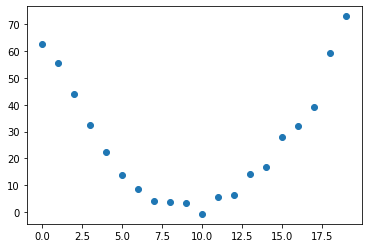

In [13]:
speed = torch.randn(20)*3 +  0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [14]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c


def mse(preds, targets):
  return ((preds-targets)**2).mean()

In [15]:
params = torch.randn(3).requires_grad_()
origin_params = params.clone()

In [16]:
preds = f(time, params)

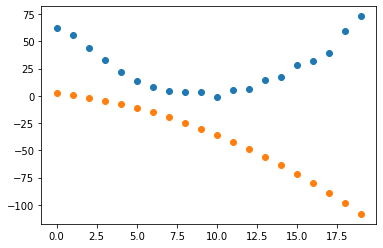

In [17]:
plt.scatter(time, speed)
plt.scatter(time, preds.detach().numpy())
plt.show()

In [18]:
loss = mse(preds, speed)
loss

tensor(6469.9390, grad_fn=<MeanBackward0>)

In [19]:
loss.backward()
params.grad

tensor([-25799.5449,  -1668.1788,   -133.0296])

In [20]:
params.grad * 1e-5

tensor([-0.2580, -0.0167, -0.0013])

In [21]:
params

tensor([-0.2200, -1.6580,  2.6536], requires_grad=True)

In [22]:
lr = 1e-5
params.data -= params.grad.data
params.grad = None

In [23]:
preds = f(time,params)
mse(preds, speed)

tensor(1.8882e+13, grad_fn=<MeanBackward0>)

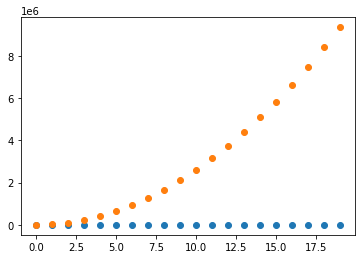

In [24]:
plt.scatter(time, speed)
plt.scatter(time, preds.detach().numpy())

In [25]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [26]:
for i in range(10): apply_step(params)

18881886289920.0
3573029535744.0
676126261248.0
127943811072.0
24210870272.0
4581438464.0
866949504.0
164055040.0
31045962.0
5876575.0


In [27]:
params = origin_params.detach().requires_grad_()

In [28]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

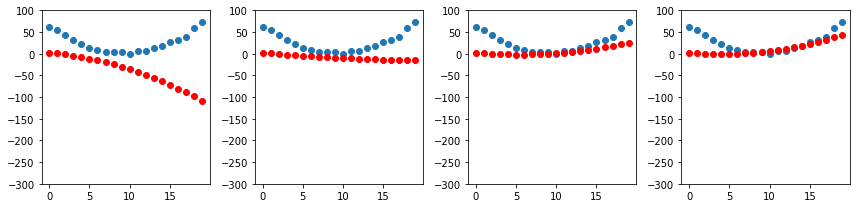

In [29]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

##SGD and Mini-Batches

In [30]:
coll = torch.arange(15)
coll

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [31]:
dl = DataLoader(coll, batch_size=5, shuffle=True)


In [32]:
list(dl)

[tensor([11,  7, 13,  3,  2]),
 tensor([5, 8, 0, 1, 9]),
 tensor([ 6, 12, 14, 10,  4])]

In [33]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [34]:
dl = DataLoader(ds, batch_size = 6, shuffle = True)
list(dl)

[(tensor([ 3, 16,  6, 13,  8, 23]), ('d', 'q', 'g', 'n', 'i', 'x')),
 (tensor([ 7, 12, 17, 25,  5, 22]), ('h', 'm', 'r', 'z', 'f', 'w')),
 (tensor([21,  4,  1,  9, 14, 10]), ('v', 'e', 'b', 'j', 'o', 'k')),
 (tensor([15, 18,  0, 19, 20, 24]), ('p', 's', 'a', 't', 'u', 'y')),
 (tensor([ 2, 11]), ('c', 'l'))]

##Creating an Optimizer

In [35]:
linear_model = nn.Linear(28*28,1)

In [36]:
w, b = linear_model.parameters()

In [37]:
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [38]:
class BasicOptim:
  def __init__(self, params, lr):
    self.params = list(params)
    self.lr = lr
  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [39]:
opt = BasicOptim(linear_model.parameters(), lr)

In [40]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)